<a href="https://colab.research.google.com/github/weihan444/ML-Hackathon/blob/PW-testing/ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample



pd.set_option("display.max_columns",None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Preprocessing

In [2]:
data_url = "https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv"
data = pd.read_csv(data_url, header=0)

data.head(5)

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0


# Feature Engineering
Selecting data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


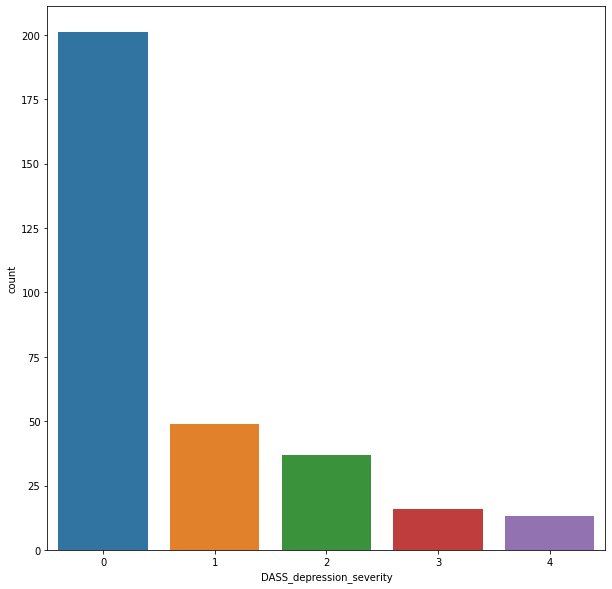

In [3]:
selected_data = data[["Age_Numerical", "Gender", "Routine_loss", "Class_hours", "Medical_illness", "Mental_illness", "COVID_symptoms", "Quarantine", "DASS_depression_severity"]]

selected_data.head(5)

X = selected_data.drop(['DASS_depression_severity'], axis=1)
y = selected_data['DASS_depression_severity']

plt.figure(figsize=(10,10))
sns.countplot(y)
plt.show()

# Split y into multi-class array
# y = keras.utils.to_categorical(y)

So we can see the data is highly imbalanced, we should perform oversampling

In [4]:

# check version number
import imblearn
print(imblearn.__version__)

0.8.1


Class=5, n=1 (0.315%)
Class=0, n=182 (57.413%)
Class=1, n=83 (26.183%)
Class=2, n=30 (9.464%)
Class=3, n=17 (5.363%)
Class=4, n=4 (1.262%)


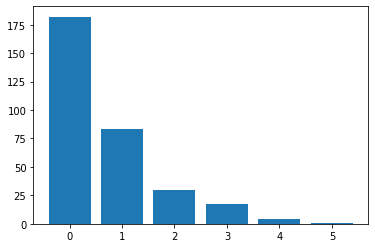

In [6]:
# load and summarize the dataset
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [71]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv'
# load the csv file as a data frame
df = read_csv(url)
data = df.values
# split into input and output elements
#data[["Age_Numerical", "Gender", "Routine_loss", "Class_hours", "Medical_illness", "Mental_illness", "COVID_symptoms", "Quarantine", "DASS_depression_severity"]]
#y = X.pop('DASS_depression_severity')
z = df.copy()
X = data[["Age_Numerical", "Gender", "Routine_loss", "Class_hours", "Medical_illness", "Mental_illness", "COVID_symptoms", "Quarantine", "DASS_depression_severity"]]
y = z.pop('DASS_depression_severity')

# label encode the target variable
#y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
y = keras.utils.to_categorical(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


IndexError: ignored

In [40]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
# define the dataset location
url = 'https://raw.githubusercontent.com/weihan444/ML-Hackathon/main/ML%20Dataset.csv'
# load the csv file as a data frame // no need to put none becuase it will become object or string 
df = pd.read_csv(url)
# split into input and output elements
X = df.copy()
y = X.pop('DASS_depression_severity')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel()) #for 1 demntional array 
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

x_train = pd.DataFrame(X_train)
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)
# label encode the target variable
# y = LabelEncoder().fit_transform(y)

df = df[]


# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# # summarize distribution
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# plt.bar(counter.keys(), counter.values())
# plt.show()

AttributeError: ignored

Split into train and test

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

# Feature Scaling
Standardize Data

In [64]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

print(X_train_stand.shape)
print(X_test_stand.shape)

print(y_train.shape)
print(y_test.shape)


(753, 33)
(252, 33)
(753, 5)
(252, 5)


# Model Training


In [67]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(
    X_train_stand, y_train,
    epochs=6
    )

Epoch 1/6
24/24 [==============================] - 1s 2ms/step - loss: 1.5795 - accuracy: 0.3174
Epoch 2/6
24/24 [==============================] - 0s 2ms/step - loss: 1.1319 - accuracy: 0.5578
Epoch 3/6
24/24 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.6746
Epoch 4/6
24/24 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.7384
Epoch 5/6
24/24 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7942
Epoch 6/6
24/24 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8406


In [ ]:
model.evaluate(X_test_stand, y_test)

In [50]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:,['loss','val_loss']].plot()

NameError: ignored